# Mixed Design Factorial ANOVA

A mixed factorial design involves more than one independent variable (IV) and contains both independent groups (between-subjects) variables and repeated measures (within-subjects) variables. 
In this notebook I will analyse a dataset that used a mixed factorial design with one repeated measures IV (with three levels/ conditions) and one independent groups IV (with two levels/ conditions). The study used a 2x3 mixed ANOVA design and investigated the effectiveness of polygraph methods for detecting lies. The repeated measures IV, called questions, recorded whether a participant told the truth (truth), told a lie (lie), or completed a control task (control) in response to a series of questions asked by the researcher. Lying and telling the truth were self-reported by participants after the study. The second IV, which was the independent groups factor called framing, assessed whether the framing of the effectiveness of polygraph methods for detecting lies influenced the results. For this IV half of the participants were primed with a sceptical view of the effectiveness of the polygraph before the study was conducted and half were primed with a positive view suggesting the method was a highly accurate technique for detecting lies. The research assessed whether there were differences on a dependent variable (DV) of mean arousal, measured by participants heart rate, when they told the truth, lied, completed the control task. Further, an assessment was made of whether mean arousal differed between levels of the framing condition. 

- IV1: Questions (3 levels: Lie/ Truth/ Control) - Repeated measures.
- IV2: Framing (2 levels: Positive/ Sceptical ) - Independent groups.

- DV - Heart Rate mean arousal. 

In the following sections I will conduct a mixed ANOVA analysis on the data, including tests of assumptions, ANOVA model, and any post-hoc or simple effects tests that may be required. 

In [1]:
# Importing key software libraries. 

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pingouin as pg

In [2]:
# Importing the dataset.

hr_df = pd.read_csv('hr_polygraph_long.csv')

hr_df.head()

,id,framing,questions,arousal
0,1,1,lie,58.536483
1,2,1,lie,74.968975
2,3,1,lie,61.114431
3,4,1,lie,60.214866
4,5,1,lie,61.410426


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         240 non-null    int64  
 1   framing    240 non-null    int64  
 2   questions  240 non-null    object 
 3   arousal    240 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.6+ KB


The data is in the long format which will make it easier to work with during the analysis. The only thing it is currently missing is category labels for the framing variable. This has been given a numberical code of 1 for the scepctical and 2 for the positive group. It would be useful to have this variable saved as a categorical object with the appropriate labels. This will help with interpreting the output later on and avoid confusion about which group was coded as 1 and which was coded as 2. The easiest way for me to deal with this is to create a new variable that maps the integer values in the framing variable to labels using the series.map method. 

In [4]:
# Creating a new variable that represent the category labels for framing
# and appending them to the dataframe. 

# Using the series.map function to add labels to the categorical variable.

a = [1, 2]
b = ["sceptical", "positive"]

hr_df['framing_cat'] = hr_df['framing'].map(dict(zip(a, b)))

In [5]:
hr_df.head()

,id,framing,questions,arousal,framing_cat
0,1,1,lie,58.536483,sceptical
1,2,1,lie,74.968975,sceptical
2,3,1,lie,61.114431,sceptical
3,4,1,lie,60.214866,sceptical
4,5,1,lie,61.410426,sceptical


In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           240 non-null    int64  
 1   framing      240 non-null    int64  
 2   questions    240 non-null    object 
 3   arousal      240 non-null    float64
 4   framing_cat  240 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 9.5+ KB


With the new framing categorical variable appended to the dataset, I can now start the analysis. 

### Tests of Assumptions

As we have both a independent groups IV and a repeated measures IV I will need to conduct both a Levene's test and Mauchly's tests of sphericity. 

In [7]:
# Conducting Levene's test on the framing IV. 

pg.homoscedasticity(hr_df, dv = 'arousal', group = 'framing_cat', center = 'mean')

,W,pval,equal_var
levene,5.605824,0.018701,False


In [8]:
# Running Mauchly's test on the questions IV using the pg.sphericity method. 

pg.sphericity(data = hr_df, dv = 'arousal', subject = 'id', within = ['questions'])

SpherResults(spher=False, W=0.8817264823613956, chi2=9.818123778136291, dof=2, pval=0.007379407788368307)

This is somewhat problematic as we can see above that we cannot assume equal variances for the independent groups factor, nor can we assume sphericity for the repeared measures factor. 
- Levene's test: F(1, 78) = 5.61, p = 0.02 
- Mauchly's test: W = 0.88, X2(2) = 9,82, p = 0.007

I will run the mixed design ANOVA using the pingouin mixed_anova method and will use an adjusted p-value where necessary to interpret the significance of the results.

### 2x3 Mixed ANOVA

In [9]:
mix_res = pg.mixed_anova(data = hr_df, dv = 'arousal', within = 'questions', subject = 'id', 
                        between = 'framing_cat')

mix_res

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,framing_cat,1221.208119,1,78,1221.208119,4.092105,0.046511,NaN,0.049848,NaN,NaN,NaN,NaN
1,questions,1856.868503,2,156,928.434252,3.617132,0.029136,0.051769,0.044318,0.894236,False,0.881726,0.007379
2,Interaction,6638.402957,2,156,3319.201478,12.931438,0.000006,NaN,0.142211,NaN,NaN,NaN,NaN


We can see from the above results that we have a significant main effect of framing when using the uncorrected p-value (F(1, 78) = 4.09, p = 0.05). A significant main effect of questions, using the Greenhouse-Geisser corrected p-value (F(2, 156) = 3.62, p = 0.05) and a highly significant interaction between framing and questions, using hte uncorrected p-value (F(2, 256) = 12.93, p < 0.0001. Although we do not have an adjusted p-value for the interaction term the extremely small p-value suggests it will still be significant following a robust test. As the interaction is significant this indicates that the main effects, although significant, are likely to be inconsistent. The next step is to conduct tests of simple effects to interpret the significant interaction.  

### Simple Effects

<AxesSubplot:xlabel='questions', ylabel='arousal'>

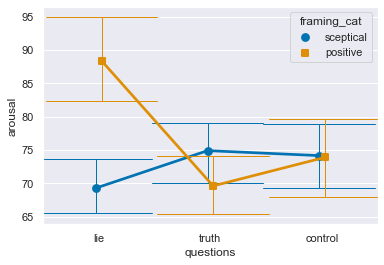

In [10]:
# Creating an interaction plot to visualise the differences between the group means using seaborn pointplot.

sns.set()
sns.pointplot(data = hr_df, x = 'questions', y = 'arousal', hue = 'framing_cat', dodge = True, 
              markers = ['o', 's'], capsize = 1, errwidth = 1, palette = 'colorblind')

In [11]:
# Next obtaining descriptive statistics by interaction group for comparison. 

# Creating a new object for each of the interaction groups:

scep_lie = hr_df.loc[(hr_df['framing_cat'] == 'sceptical') & (hr_df['questions'] == 'lie')]['arousal']
scep_truth = hr_df.loc[(hr_df['framing_cat'] == 'sceptical') & (hr_df['questions'] == 'truth')]['arousal']
scep_contr = hr_df.loc[(hr_df['framing_cat'] == 'sceptical') & (hr_df['questions'] == 'control')]['arousal']
pos_lie = hr_df.loc[(hr_df['framing_cat'] == 'positive') & (hr_df['questions'] == 'lie')]['arousal']
pos_truth = hr_df.loc[(hr_df['framing_cat'] == 'positive') & (hr_df['questions'] == 'truth')]['arousal']
pos_contr = hr_df.loc[(hr_df['framing_cat'] == 'positive') & (hr_df['questions'] == 'control')]['arousal']


In [12]:
# Printing the mean for each of the above interaction group objects. 

print(f"Sceptical & Lie: {scep_lie.mean():.2f}")
print(f"Sceptical & Truth: {scep_truth.mean():.2f}")
print(f"Sceptical & Control: {scep_contr.mean():.2f}")

print(f"Positive & Lie: {pos_lie.mean():.2f}")
print(f"Positive & Truth: {pos_truth.mean():.2f}")
print(f"Positive & Control: {pos_contr.mean():.2f}")

Sceptical & Lie: 69.28
Sceptical & Truth: 74.90
Sceptical & Control: 74.15
Positive & Lie: 88.38
Positive & Truth: 69.60
Positive & Control: 73.88


Inspection of the above interaction plot indicates that there is a significant difference in arousal between the sceptical and positive framing conditions when participants lied. With those given a positive framing of how effective the technique is for detecting lies experiencing significantly higher arousal. However, there does not seem to be a significant difference between framing conditions at the truth and control levels. When considering the sceptical group (blue line) in isolation there also does not appear to be a signficant difference in arousal between the lie, truth, and control conditions, as indicated by the large degree of overlap between the error bars (95% confidence intervals). Looking only at the positive group (orange line), however, we see that arousal seems to be significantly higher in the lie condition when compared to the truth and control condition. Further, the truth and control condition do not seem to differ signficantly. 

Tests of simple effects, in the form of pairwise comparisons, can be conducted to assess which differences between groups are statistically significant. 

In [13]:
# Running pairwise comparisons using the pingouin pairwise_tests method. 
# I here run a Bonferroni adjustment to make the test stricter as a result of the lack of homogeneity of variance and
# sphericity in the dataset. 

simple_eff = pg.pairwise_tests(data = hr_df, dv = 'arousal', between = 'framing_cat', 
                               within = 'questions', subject = 'id', padjust = 'bonf')

simple_eff

,Contrast,questions,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,questions,-,control,lie,True,True,-1.626385,79.0,two-sided,0.107850,0.323551,bonf,0.434,-0.257469
1,questions,-,control,truth,True,True,0.801622,79.0,two-sided,0.425176,1.000000,bonf,0.168,0.108861
2,questions,-,lie,truth,True,True,2.252364,79.0,two-sided,0.027075,0.081224,bonf,1.332,0.382085
3,framing_cat,-,positive,sceptical,False,True,2.022895,78.0,two-sided,0.046511,NaN,NaN,1.345,0.447970
4,questions * framing_cat,control,positive,sceptical,False,True,-0.068332,78.0,two-sided,0.945696,1.000000,bonf,0.233,-0.015132
5,questions * framing_cat,lie,positive,sceptical,False,True,5.004393,78.0,two-sided,0.000003,0.000010,bonf,4552.783,1.108222
6,questions * framing_cat,truth,positive,sceptical,False,True,-1.661068,78.0,two-sided,0.100715,0.302144,bonf,0.764,-0.367843


Note that the above output only gives us three of our simple effects comparisons that we wish to make. Ignoring the first four rows (indexed 0 to 3) that relate to main effects, we can see that pairwise comparisons have been conducted holding each level of questions constant and comparing the framing conditions. We can see from this that the positive and sceptical group means are not statistically significantly different in the control condition; the positive an sceptical group means are significantly different in the lie condition; and are not significantly different in the truth condition. 

Making use fo the group means printed above we can formally report these results as:

- Control: Positive (Mean = 73.88) V Sceptical (Mean = 74.15). Not significantly different (t(78) = 0.07, p = 1.000)
- Lie: Positive (Mean = 88.38) V Sceptical (Mean = 69.28). Significantly different (t(78) = 5.00, p < 0.0001)
- Truth: Positive (Mean = 69.60) V Sceptical (Mean = 74.90). Not significantly different (t(78) = 1.66, p = 0.30)

There are further test we would like to run holding each framing group constant and comparing the three questions conditions. In order to do this we can run the above pairwise tests again but this time specify a parameter that within_first = False.

In [14]:
# Running pairwise comparisons againusing the pingouin pairwise_tests method. 
# I here run a Bonferroni adjustment to make the test stricter as a result of the lack of homogeneity of variance and
# sphericity in the dataset. 
# Note the difference to the above syntax. Here I have added another argument specifying within_first = False. 

simple_eff2 = pg.pairwise_tests(data = hr_df, dv = 'arousal', between = 'framing_cat', 
                               within = 'questions', subject = 'id', padjust = 'bonf', within_first = False)

simple_eff2

,Contrast,framing_cat,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,framing_cat,-,positive,sceptical,False,True,2.022895,78.0,two-sided,0.046511,NaN,NaN,1.345,0.447970
1,questions,-,control,lie,True,True,-1.626385,79.0,two-sided,0.107850,0.323551,bonf,0.434,-0.257469
2,questions,-,control,truth,True,True,0.801622,79.0,two-sided,0.425176,1.000000,bonf,0.168,0.108861
3,questions,-,lie,truth,True,True,2.252364,79.0,two-sided,0.027075,0.081224,bonf,1.332,0.382085
4,framing_cat * questions,positive,control,lie,True,True,-3.809326,39.0,two-sided,0.000482,0.002893,bonf,58.628,-0.742130
5,framing_cat * questions,positive,control,truth,True,True,1.367253,39.0,two-sided,0.179375,1.000000,bonf,0.403,0.254567
6,framing_cat * questions,positive,lie,truth,True,True,4.859113,39.0,two-sided,0.000020,0.000117,bonf,1084.92,1.093518
7,framing_cat * questions,sceptical,control,lie,True,True,1.209247,39.0,two-sided,0.233848,1.000000,bonf,0.336,0.315339
8,framing_cat * questions,sceptical,control,truth,True,True,-0.241590,39.0,two-sided,0.810364,1.000000,bonf,0.175,-0.047347
9,framing_cat * questions,sceptical,lie,truth,True,True,-1.619680,39.0,two-sided,0.113360,0.680163,bonf,0.565,-0.388181


In this second output table we can see that framing has been used as the variable held constant and each of the levels of questions are being compared. These results show that in the positive condition control and lie have significantly different mean arousal and lie and truth have significantly different mean arousal. However, control and truth do not have significantly different mean arousal. When consindering the sceptical condition in isolation we can see that none of the questions levels are significantly different form one another. These results confirm what we could see in the interaction plot as the sceptical (blue line) line was almost completely flat. 

The results of these comparisons are summarised below: 

- Positive: Control (Mean = 73.88) V Lie (Mean = 88.38). Significantly different (t(39) = 3.81, p = 0.0029).
- Positive: Control (Mean = 73.88) V Truth (Mean = 69.60). Not significantly different (t(39) = 1.37, p = 1.000).
- Positive: Lie (Mean = 88.38) V Truth (Mean = 69.60). Significantly different (t(39) = 4.86, p = 0.0001).

- Sceptical: Control (Mean = 74.15) V Lie (Mean = 69.28). Not significantly different (t(39) = 1.21, p = 1.000).
- Sceptical: Control (Mean = 74.15) V Truth (Mean = 74.90). Not significantly different (t(39) = 0.24, p = 1.000).
- Sceptical: Lie (Mean = 69.28) V Truth (Mean = 74.90). Not significantly different (t(39) = 1.62, p = 0.68). 

Overall, these results indicate that framing can influence the results of a lie detector test and only participants who have been given a positive framing of how effective it is as a technique are likely to experience higher arousal when telling lies. However, if participants are given a sceptical framing and led to believe the method is not effective, they are likely to experience lower or normal levels of arousal when that are no different to when they tell the truth. These results indicate that the administrator of a lie detector test can influence the results based on the belief they can induce in the participant and this method is not a reliable technique for detecting lies.  